In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


xy= pd.read_csv('ADNI_adnimerge_20170629_QT-freeze.csv',header=1)

In [2]:
xy.columns

Index(['RID', 'VISCODE', 'COLPROT', 'ORIGPROT', 'EXAMDATE', 'Dxbl', 'AGE',
       'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'PTID',
       'SITE', 'APOE4', 'FDG', 'PIB', 'AV45', 'ABETA', 'PTAU', 'TAU', 'CDRSB',
       'ADAS11', 'ADAS13', 'MMSE', 'RAVLTimmediate', 'RAVLTlearning',
       'RAVLTforgetting', 'RAVLTpercforgetting', 'FAQ', 'MOCA', 'EcogPtMem',
       'EcogPtLang', 'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan',
       'EcogPtDivatt', 'EcogPtTotal', 'EcogSPMem', 'EcogSPLang',
       'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 'EcogSPDivatt',
       'EcogSPTotal', 'FLDSTRENG', 'FSVERSION', 'Ventricles', 'Hippocampus',
       'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'DX',
       'EXAMDATEbl', 'CDRSBbl', 'ADAS11bl', 'ADAS13bl', 'MMSEbl',
       'RAVLTimmediatebl', 'RAVLTlearningbl', 'RAVLTforgettingbl',
       'RAVLTpercforgettingbl', 'FAQbl', 'FLDSTRENGbl', 'FSVERSIONbl',
       'Ventriclesbl', 'Hippocampusbl', 'WholeBrainbl', 'Entorhinalbl',


In [3]:
XY=xy[['RID', 'VISCODE','AGE',       'PTGENDER', 'PTEDUCAT',         'APOE4'
       , 'FDG', 'PIB', 'AV45', 'ABETA', 'PTAU', 'TAU', 'CDRSB',
       'RAVLTimmediate', 'RAVLTlearning',
       'RAVLTforgetting', 'RAVLTpercforgetting', 'FAQ', 'MOCA', 'EcogPtMem',
       'EcogPtLang', 'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan',
       'EcogPtDivatt', 'EcogPtTotal', 'EcogSPMem', 'EcogSPLang',
       'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 'EcogSPDivatt',
       'EcogSPTotal',  'Ventricles', 'Hippocampus',
       'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV','Dxbl']]#,'MMSE'

In [4]:
xybl=XY[XY['VISCODE']=='bl']

XY=xybl

In [5]:
XY.groupby('Dxbl').std()

,RID,AGE,PTEDUCAT,APOE4,FDG,PIB,AV45,CDRSB,RAVLTimmediate,RAVLTlearning,...,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
Dxbl,,,,,,,,,,,,,,,,,,,,,
AD,2032.024806,7.791297,2.990758,0.712715,0.143973,0.402087,0.214909,1.666593,7.554414,1.774835,...,0.866721,0.935966,0.670612,24683.493006,1021.293083,113689.244053,675.599453,2618.813985,3103.477675,181386.893826
CN,1923.081632,5.733217,2.733417,0.513935,0.114517,NaN,0.176631,0.127974,9.840803,2.330743,...,0.416546,0.484433,0.249346,18831.660324,904.313810,103318.806311,643.577001,2436.000678,2674.151032,158989.324792
EMCI,1168.111385,7.500441,2.658281,0.623309,0.118674,NaN,0.204626,0.756735,10.713808,2.462465,...,0.677580,0.776893,0.541186,20391.030714,1003.247777,104325.902715,669.040158,2596.835301,2650.880586,152490.875061
LMCI,1759.058482,7.504839,2.938854,0.693953,0.136413,0.364101,0.238378,0.921366,9.513172,2.382997,...,0.840263,0.859292,0.659385,23531.048629,1107.027880,109830.267989,747.441939,2579.190696,2947.686096,168421.482732
SMC,76.302696,5.563880,2.520589,0.495442,0.117410,NaN,0.182472,0.175101,9.705664,2.234259,...,0.465207,0.572051,0.340600,17209.404356,927.533596,99722.605866,583.229350,2168.570606,2636.042515,153592.561113


In [6]:
XY.iloc[0,1:10]

VISCODE          bl
AGE            74.3
PTGENDER       Male
PTEDUCAT         16
APOE4             0
FDG         1.36926
PIB             NaN
AV45            NaN
ABETA           NaN
Name: 0, dtype: object

In [7]:
XY.isnull().sum().sum()/(1631*40)

0.2809166155732679

In [8]:
XY.isnull().sum()

RID                       0
VISCODE                   0
AGE                       0
PTGENDER                  0
PTEDUCAT                  0
APOE4                    12
FDG                     434
PIB                    1717
AV45                    843
ABETA                   522
PTAU                    522
TAU                     522
CDRSB                     0
RAVLTimmediate            6
RAVLTlearning             6
RAVLTforgetting           6
RAVLTpercforgetting      11
FAQ                       9
MOCA                    832
EcogPtMem               823
EcogPtLang              823
EcogPtVisspat           827
EcogPtPlan              824
EcogPtOrgan             845
EcogPtDivatt            830
EcogPtTotal             823
EcogSPMem               829
EcogSPLang              828
EcogSPVisspat           842
EcogSPPlan              838
EcogSPOrgan             868
EcogSPDivatt            849
EcogSPTotal             830
Ventricles               82
Hippocampus             248
WholeBrain          

In [9]:
XY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1737 entries, 0 to 12747
Data columns (total 41 columns):
RID                    1737 non-null int64
VISCODE                1737 non-null object
AGE                    1737 non-null float64
PTGENDER               1737 non-null object
PTEDUCAT               1737 non-null int64
APOE4                  1725 non-null float64
FDG                    1303 non-null float64
PIB                    20 non-null float64
AV45                   894 non-null float64
ABETA                  1215 non-null object
PTAU                   1215 non-null object
TAU                    1215 non-null object
CDRSB                  1737 non-null float64
RAVLTimmediate         1731 non-null float64
RAVLTlearning          1731 non-null float64
RAVLTforgetting        1731 non-null float64
RAVLTpercforgetting    1726 non-null float64
FAQ                    1728 non-null float64
MOCA                   905 non-null float64
EcogPtMem              914 non-null float64
EcogPt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f132176ec18>]],
      dtype=object)

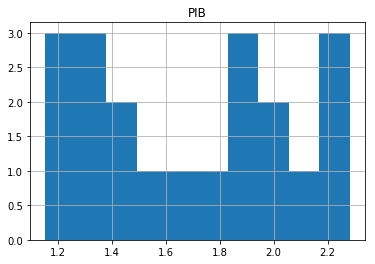

In [42]:
import matplotlib.pyplot as plt

%matplotlib inline
XY.hist('PIB')


In [11]:
XY.isnull().sum(axis=0)

RID                       0
VISCODE                   0
AGE                       0
PTGENDER                  0
PTEDUCAT                  0
APOE4                    12
FDG                     434
PIB                    1717
AV45                    843
ABETA                   522
PTAU                    522
TAU                     522
CDRSB                     0
RAVLTimmediate            6
RAVLTlearning             6
RAVLTforgetting           6
RAVLTpercforgetting      11
FAQ                       9
MOCA                    832
EcogPtMem               823
EcogPtLang              823
EcogPtVisspat           827
EcogPtPlan              824
EcogPtOrgan             845
EcogPtDivatt            830
EcogPtTotal             823
EcogSPMem               829
EcogSPLang              828
EcogSPVisspat           842
EcogSPPlan              838
EcogSPOrgan             868
EcogSPDivatt            849
EcogSPTotal             830
Ventricles               82
Hippocampus             248
WholeBrain          

In [12]:
sum(XY.apply(lambda x: sum(x.isnull().values), axis = 1)>0)

1737

In [13]:
# Dropping values which are not meaningful
# ABETHA
XY['ABETA']=XY['ABETA'].replace('>1700',None)
XY['ABETA']=XY['ABETA'].replace('<200',None)

# PTAU
XY['PTAU']=XY['PTAU'].replace('>120',None)
XY['PTAU']=XY['PTAU'].replace('<8',None)
# TAU

XY['TAU']=XY['TAU'].replace('>1300',None)
XY['TAU']=XY['TAU'].replace('<80',None)

XY.shape


(1737, 41)

In [14]:
XY = XY.drop(XY[XY['Ventricles']==0].index)
XY = XY.dropna(subset=['Dxbl'])

In [15]:
XY = XY.drop(XY[XY['Dxbl']=='MCI to Dementia'].index)
XY = XY.drop(XY[XY['Dxbl']=='NL to MCI'].index)
XY = XY.drop(XY[XY['Dxbl']=='MCI to NL'].index)
XY = XY.drop(XY[XY['Dxbl']=='Dementia to MCI'].index)
XY = XY.drop(XY[XY['Dxbl']=='NL to Dementia'].index)
XY = XY.drop(XY[XY['Dxbl']=='SMC'].index)
# XY = XY.drop(XY[XY['MMSE'].isnull()].index)

In [16]:
XY['Dxbl'].value_counts()

LMCI    562
CN      417
AD      342
EMCI    310
Name: Dxbl, dtype: int64

In [17]:
le = preprocessing.LabelEncoder()
XY['Dxbl']=le.fit_transform(XY['Dxbl'])

In [18]:
# redefining value types which we deal with them in the above section
# ABETA
XY['ABETA']=(XY['ABETA'].astype(float))
XY = XY.infer_objects()
# PTAU
XY['PTAU']=(XY['PTAU'].astype(float))
# TAU
XY['TAU']=(XY['TAU'].astype(float))

In [19]:
XY=XY.set_index('RID',drop=False)

In [20]:
XY.columns

Index(['RID', 'VISCODE', 'AGE', 'PTGENDER', 'PTEDUCAT', 'APOE4', 'FDG', 'PIB',
       'AV45', 'ABETA', 'PTAU', 'TAU', 'CDRSB', 'RAVLTimmediate',
       'RAVLTlearning', 'RAVLTforgetting', 'RAVLTpercforgetting', 'FAQ',
       'MOCA', 'EcogPtMem', 'EcogPtLang', 'EcogPtVisspat', 'EcogPtPlan',
       'EcogPtOrgan', 'EcogPtDivatt', 'EcogPtTotal', 'EcogSPMem', 'EcogSPLang',
       'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 'EcogSPDivatt',
       'EcogSPTotal', 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal',
       'Fusiform', 'MidTemp', 'ICV', 'Dxbl'],
      dtype='object')

In [21]:
XY.columns

df_xy_X=XY.iloc[:,1:-1]
df_xy_y=XY.iloc[:,-1]

In [22]:
df_xy_X=df_xy_X.drop(['VISCODE'],axis=1)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_xy_X['PTGENDER']=le.fit_transform(df_xy_X['PTGENDER'])

In [23]:
df_xy_y.value_counts()

3    562
1    417
0    342
2    310
Name: Dxbl, dtype: int64

In [24]:
Y= df_xy_y


In [25]:
#split to train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_xy_X, Y, test_size=0.33, random_state=42)

In [26]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
model = XGBClassifier()



y_score_auc = model.fit(X_train,y_train).predict_proba(X_test)
y_score = np.argmax(y_score_auc, axis=1)
predictions = [round(value) for value in y_score]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(precision_score(y_score,y_test, average='weighted'))
print(recall_score(y_score,y_test, average='weighted'))
print(f1_score(y_score,y_test, average='weighted'))


Accuracy: 80.52%
0.8062431204022966
0.8051948051948052
0.8031452270318622


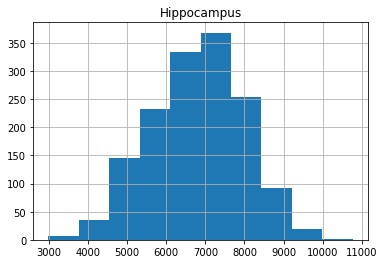

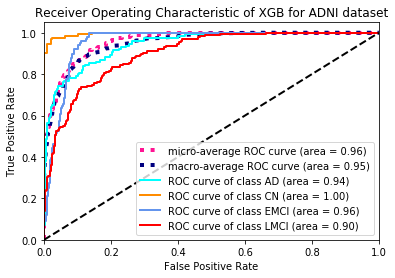

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

lw=2
# Binarize the output
y_test1 = label_binarize(y_test, classes=[0, 1, 2,3 ])
y_score =y_score_auc# label_binarize(y_score_auc, classes=[0, 1, 2,3 ])
n_classes = y_test1.shape[1]
# Compute macro-average ROC curve and ROC area
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
name= {0:'AD',1:'CN',2:'EMCI',3:'LMCI'}
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(name[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of XGB for ADNI dataset')
plt.legend(loc="lower right")
plt.show()


In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm

X_test = X_test.fillna(0)
X_train = X_train.fillna(0)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = (scaler.fit_transform(X_train))
X_test = (scaler.fit_transform(X_test))


classifier = svm.SVC(gamma=0.01, C=10, kernel='rbf')

# y_score=clf.fit(X_train,y_train).decision_function(X_test) 
# # y_predict=clf.predict(X_test)


# classifier = OneVsRestClassifier(svm.SVC(gamma= 0.0001, C= 100, kernel= 'rbf'))
y_score_auc = classifier.fit(X_train, y_train).decision_function(X_test)
y_score=np.argmax(y_score_auc, axis=1)
y_pred=classifier.predict(X_test)


print(accuracy_score(y_test, y_score))
print(precision_score(y_score,y_test, average='weighted'))
print(recall_score(y_score,y_test, average='weighted'))
print(f1_score(y_score,y_test, average='weighted'))

0.7421150278293135
0.7555224176258266
0.7421150278293135
0.7399661700840013


In [29]:
y_score

array([2, 2, 2, 3, 2, 3, 1, 0, 3, 3, 3, 0, 1, 0, 0, 2, 1, 2, 3, 0, 1, 3,
       2, 0, 3, 2, 2, 3, 3, 1, 0, 0, 2, 2, 3, 1, 3, 2, 0, 2, 3, 2, 2, 3,
       2, 1, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 3, 3, 1, 3,
       3, 1, 2, 1, 3, 0, 2, 3, 1, 3, 2, 0, 3, 0, 1, 2, 2, 1, 2, 3, 1, 2,
       1, 0, 2, 3, 3, 0, 3, 3, 2, 3, 2, 0, 0, 0, 2, 2, 1, 3, 3, 1, 0, 3,
       3, 3, 1, 2, 0, 3, 2, 2, 3, 1, 0, 0, 1, 3, 2, 1, 3, 0, 0, 1, 0, 2,
       3, 2, 2, 0, 2, 3, 1, 0, 3, 3, 1, 2, 3, 2, 1, 3, 1, 1, 1, 2, 0, 1,
       2, 2, 0, 1, 3, 0, 3, 3, 2, 3, 2, 0, 1, 3, 3, 3, 0, 2, 1, 0, 2, 2,
       3, 1, 3, 0, 3, 1, 1, 0, 2, 0, 0, 1, 2, 1, 3, 3, 2, 1, 2, 3, 1, 2,
       3, 1, 3, 0, 0, 1, 3, 1, 2, 3, 1, 0, 3, 1, 2, 1, 3, 1, 1, 1, 2, 3,
       2, 1, 3, 0, 2, 3, 1, 2, 2, 2, 1, 3, 3, 1, 0, 3, 0, 1, 2, 3, 1, 1,
       0, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 3, 3, 0, 0, 2, 0, 3, 3, 2, 2, 0,
       3, 1, 3, 1, 3, 0, 1, 3, 0, 2, 1, 3, 0, 3, 3, 2, 1, 1, 3, 2, 1, 2,
       1, 1, 2, 3, 0, 2, 2, 3, 1, 2, 3, 1, 3, 1, 2,

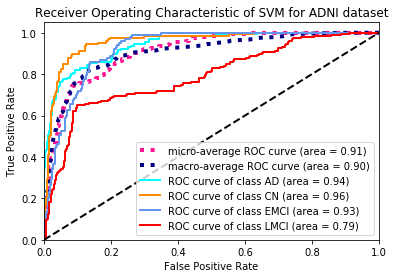

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

lw=2
# Binarize the output
y_test1 = label_binarize(y_test, classes=[0, 1, 2,3 ])
y_score = y_score_auc#label_binarize(y_score, classes=[0, 1, 2,3 ])
n_classes = y_test1.shape[1]
# Compute macro-average ROC curve and ROC area
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
name= {0:'AD',1:'CN',2:'EMCI',3:'LMCI'}
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(name[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of SVM for ADNI dataset')
plt.legend(loc="lower right")
plt.show()


In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
y_score_auc= clf.fit(X_train, y_train).predict_proba(X_test)
y_score=np.argmax(y_score_auc, axis=1)#clf.predict(X_test)
print(accuracy_score(y_test, y_score))
print(precision_score(y_score,y_test, average='weighted'))
print(recall_score(y_score,y_test, average='weighted'))
print(f1_score(y_score,y_test, average='weighted'))

0.7755102040816326
0.7801141695442414
0.7755102040816326
0.7728251548257808


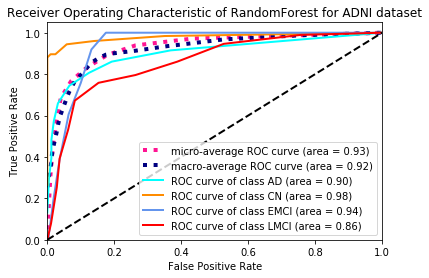

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

lw=2
# Binarize the output
y_test1 = label_binarize(y_test, classes=[0, 1, 2,3 ])
y_score = y_score_auc#label_binarize(y_score, classes=[0, 1, 2,3 ])
n_classes = y_test1.shape[1]
# Compute macro-average ROC curve and ROC area
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
name= {0:'AD',1:'CN',2:'EMCI',3:'LMCI'}
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(name[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of RandomForest for ADNI dataset')
plt.legend(loc="lower right")
plt.show()


In [33]:
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_score=clf.predict(X_test)
print(accuracy_score(y_test, y_score))
print(precision_score(y_score,y_test, average='weighted'))
print(recall_score(y_score,y_test, average='weighted'))
print(f1_score(y_score,y_test, average='weighted'))

0.8033395176252319
0.8151660105390096
0.8033395176252319
0.8007959848327575


In [34]:
y_score

array([2, 0, 2, 3, 1, 3, 1, 0, 3, 3, 3, 0, 1, 0, 0, 2, 1, 2, 3, 0, 1, 3,
       2, 3, 3, 2, 2, 3, 3, 3, 0, 0, 2, 2, 3, 3, 0, 1, 0, 2, 3, 2, 3, 3,
       2, 1, 1, 3, 2, 3, 1, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 3, 1, 3, 0, 2, 3, 2, 3, 2, 3, 3, 0, 1, 2, 3, 1, 2, 2, 2, 2,
       1, 0, 2, 3, 3, 0, 3, 3, 2, 3, 2, 0, 0, 0, 2, 2, 1, 3, 3, 3, 0, 3,
       3, 1, 3, 2, 0, 3, 2, 2, 3, 3, 0, 0, 2, 3, 2, 1, 3, 0, 0, 2, 0, 2,
       3, 2, 2, 0, 2, 3, 1, 0, 0, 3, 1, 2, 3, 2, 1, 3, 1, 1, 1, 2, 0, 1,
       2, 2, 0, 3, 3, 0, 3, 3, 2, 3, 2, 0, 1, 2, 3, 3, 2, 2, 1, 0, 2, 2,
       3, 1, 3, 0, 3, 1, 1, 2, 2, 0, 0, 1, 3, 1, 3, 3, 2, 1, 2, 3, 3, 2,
       3, 1, 3, 0, 3, 1, 3, 1, 2, 3, 1, 0, 3, 1, 1, 1, 3, 1, 1, 1, 2, 3,
       2, 1, 3, 0, 2, 3, 3, 2, 2, 1, 1, 2, 1, 1, 0, 3, 0, 1, 2, 3, 2, 1,
       0, 2, 3, 0, 1, 1, 2, 1, 2, 0, 3, 3, 3, 0, 0, 2, 0, 1, 3, 1, 2, 0,
       3, 2, 3, 2, 3, 0, 1, 3, 3, 1, 1, 3, 3, 0, 3, 2, 1, 1, 3, 3, 1, 2,
       1, 1, 2, 3, 0, 2, 2, 3, 3, 2, 3, 1, 3, 3, 2,